<a href="https://colab.research.google.com/github/vocanalytics/F_STL_Challenge/blob/main/Tech_Challenge_For_FoodStyles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# The challenge
You are given a dataset (assets/dataset.zip) containing information about restaurants all over Europe. The goal of the challenge is to make sense of the dataset and understand it in such a way that informed, data-based business decisions can be made. To make things easier, the challenge is split into three conceptually independent parts, with action points at each part. 


In [25]:
import pandas as pd
# Importing pandas for dataframe operations. 
import matplotlib 
import seaborn



In [3]:
df_copy= pd.read_csv("/content/drive/MyDrive/cognative/Denemeler /FoodStyles/dataset.csv")


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df = df_copy.copy()

In [5]:
df.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [8]:
df.shape
#We have 1083397 observations and 42 attributes.

(1083397, 42)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,1067607.0,46.567182,5.882611,27.640310,41.909860,46.58510,51.405367,69.941560
longitude,1067607.0,5.838040,8.639410,-71.218094,-0.802732,5.64653,12.237675,33.369423
open_days_per_week,593832.0,6.327081,0.966734,1.000000,6.000000,7.00000,7.000000,7.000000
open_hours_per_week,593832.0,62.023282,30.538134,0.000000,39.000000,58.50000,81.500000,168.000000
working_shifts_per_week,593832.0,7.630754,2.550128,1.000000,6.000000,7.00000,7.000000,15.000000
avg_rating,986761.0,4.035943,0.713694,1.000000,3.500000,4.00000,4.500000,5.000000
total_reviews_count,1031162.0,102.888989,267.241480,0.000000,6.000000,24.00000,93.000000,52404.000000
reviews_count_in_default_language,988204.0,44.563415,148.728179,1.000000,2.000000,7.00000,26.000000,15229.000000
excellent,988204.0,24.653440,89.850801,0.000000,1.000000,3.00000,13.000000,9383.000000
very_good,988204.0,10.490516,35.512256,0.000000,0.000000,2.00000,6.000000,4091.000000


# **Data Cleaning**
1. Identify the columns with mixed data types.
2. For each column, count the number of rows per data type.
3. Would removing missing values solve the mixed data type problem?


## **1. Identify the columns with mixed data types.**

In [10]:
df.info()
# Columns which has object as data type,they can be mixed data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [11]:
# Define a function that checks the data type of a column
def dtypes(col):
    types = set(col.apply(type))
    return len(types) > 1

In [12]:
# Use the function to check the data types of each column
mixed_type_col = df.apply(dtypes)

In [13]:
# Print the mixed data type columns
print(mixed_type_col)

restaurant_link                      False
restaurant_name                      False
original_location                    False
country                              False
region                                True
province                              True
city                                  True
address                              False
latitude                             False
longitude                            False
claimed                               True
awards                                True
popularity_detailed                   True
popularity_generic                    True
top_tags                              True
price_level                           True
price_range                           True
meals                                 True
cuisines                              True
special_diets                         True
features                              True
vegetarian_friendly                  False
vegan_options                        False
gluten_free

## **2- For each column, count the number of rows per data type.**

In [14]:
df.dtypes.value_counts()
# value_counts used for counting the number of rows per data type

object     25
float64    17
dtype: int64

We have 25 column which have mixed data type. And 17 column which have float64 data type

**Infering Data Types**

To correct the data types, we can use some functions to infer from the data type.

In [15]:
#Infering data type of each column that has an object data type.
for col in df:
    inferred_type = pd.api.types.infer_dtype(df[col])
    print(f"Column: {col}, Inferred data type: {inferred_type}")

Column: restaurant_link, Inferred data type: string
Column: restaurant_name, Inferred data type: string
Column: original_location, Inferred data type: string
Column: country, Inferred data type: string
Column: region, Inferred data type: string
Column: province, Inferred data type: string
Column: city, Inferred data type: string
Column: address, Inferred data type: string
Column: latitude, Inferred data type: floating
Column: longitude, Inferred data type: floating
Column: claimed, Inferred data type: string
Column: awards, Inferred data type: string
Column: popularity_detailed, Inferred data type: string
Column: popularity_generic, Inferred data type: string
Column: top_tags, Inferred data type: string
Column: price_level, Inferred data type: string
Column: price_range, Inferred data type: string
Column: meals, Inferred data type: string
Column: cuisines, Inferred data type: string
Column: special_diets, Inferred data type: string
Column: features, Inferred data type: string
Column: v

In [16]:
# convert the data with best possible data types.
df = df.convert_dtypes()


In [17]:
df.dtypes.value_counts()

string     25
Int64       9
Float64     8
dtype: int64

We have data types with 25 String, 9 Integer and 8 Floating

## **3. Would removing missing values solve the mixed data type problem?**
To understand this it's important to understand the *nature* of the missing data and the impact it has on our analysis before removing it.

We can use visualization tools such as *matplotlib, seaborn or missingno* to check the *distribution* of missing values across the columns. 
If the missing values are concentrated in *specific columns or rows*, it is more likely that removing them will improve the quality of our data.

Checking the *correlation* between missing values and data types is another aproach.  If the missing values are concentrated in *specific data types*. If so, it is more likely that removing them will improve the quality of your data.
If the proportion of missing data is very high, it may be better to remove the whole column or rows which have high missing values as it may not provide much useful information.

If the missingness **is not random** and is related to some other variables in the dataset. In this case, simply removing missing values or imputing them with a mean or median value ***may not be appropriate*** and could lead to biased or incorrect results.

One approach to handle missing data with dependency is to use multiple imputation methods. These methods involve creating multiple imputed datasets, each with slightly different imputed values for the missing data, and then combining the results from each dataset to produce a more robust estimate.



In [18]:
df.isnull().sum()
# Checking the number of missing data for each column

restaurant_link                           0
restaurant_name                           0
original_location                         0
country                                   0
region                                50323
province                             340632
city                                 400685
address                                   0
latitude                              15790
longitude                             15790
claimed                                1842
awards                               820264
popularity_detailed                   94988
popularity_generic                    97792
top_tags                             110634
price_level                          277205
price_range                          779070
meals                                448050
cuisines                             169103
special_diets                        743141
features                             765990
vegetarian_friendly                       0
vegan_options                   

In [19]:
import missingno as msno
# missingno is used for missing data visualization 

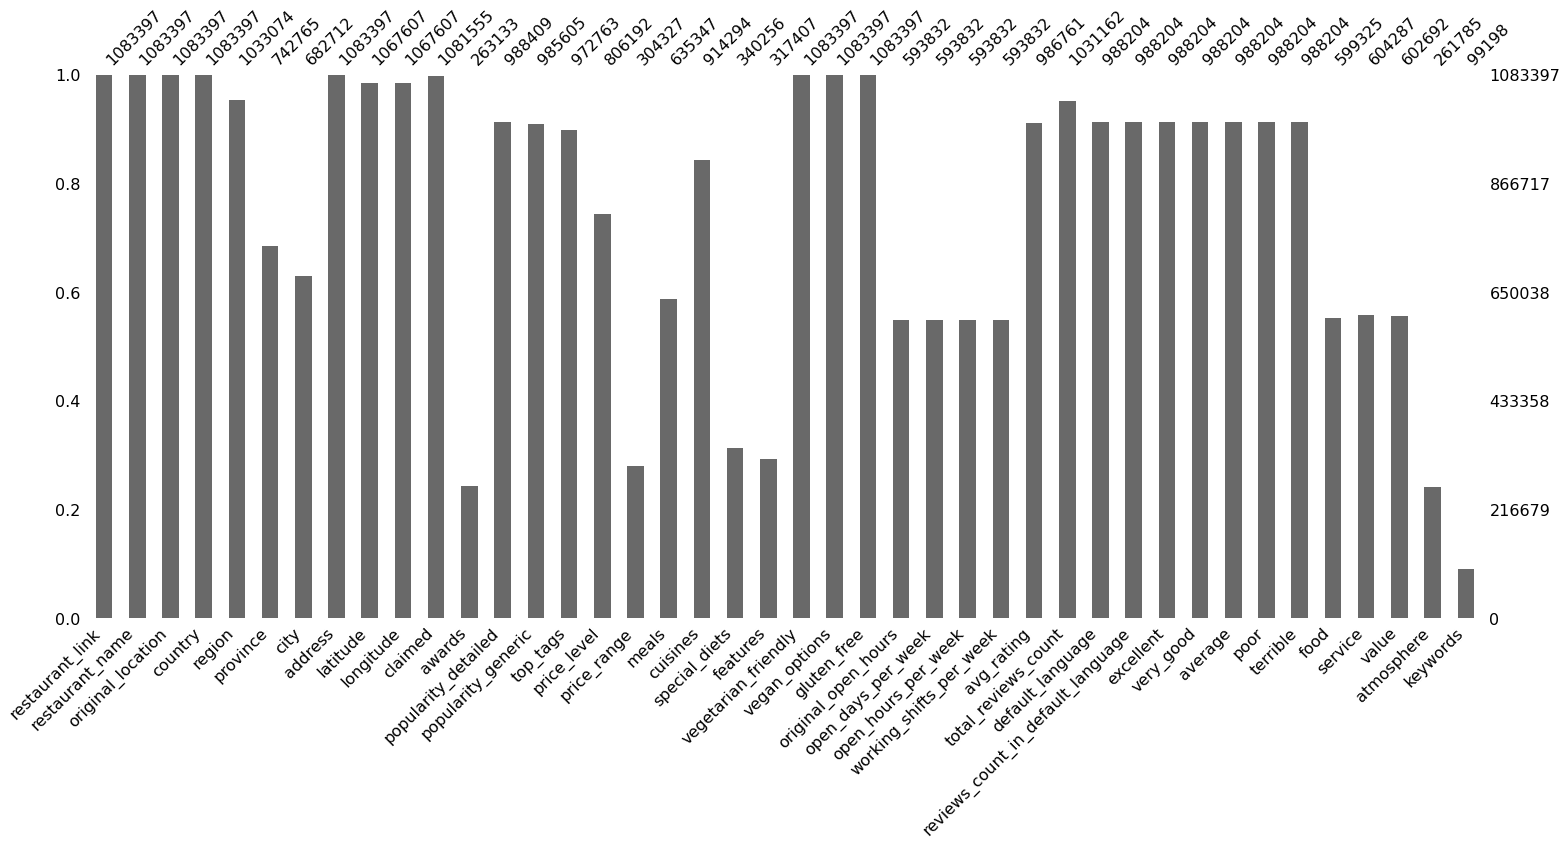

In [20]:
msno.bar(df)
#  This function will create a bar chart of the missing values in our DataFrame

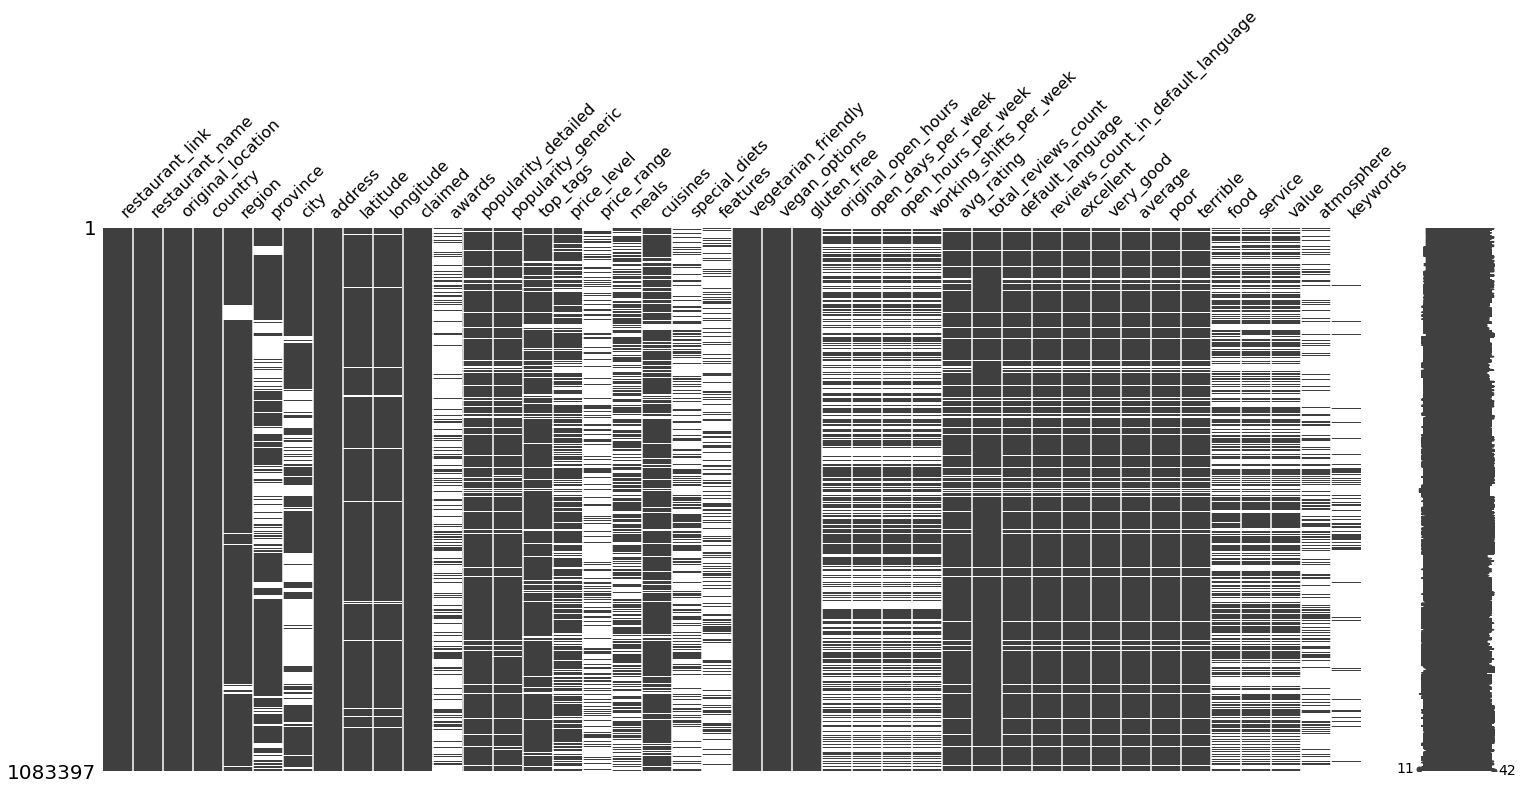

In [21]:
  msno.matrix(df) 
  #  This function will create a matrix of the missing values in our DataFrame

We can see that there is dependency in the missing data. Expecially between rating columns and review columns. It means that the missingness is not random and is related to some other variables in the dataset. In this case, simply removing missing values or imputing them with a mean or median value may not be appropriate and could lead to biased or incorrect results.

In [22]:
import seaborn as sns
# seaborn is used for heatmap funciton

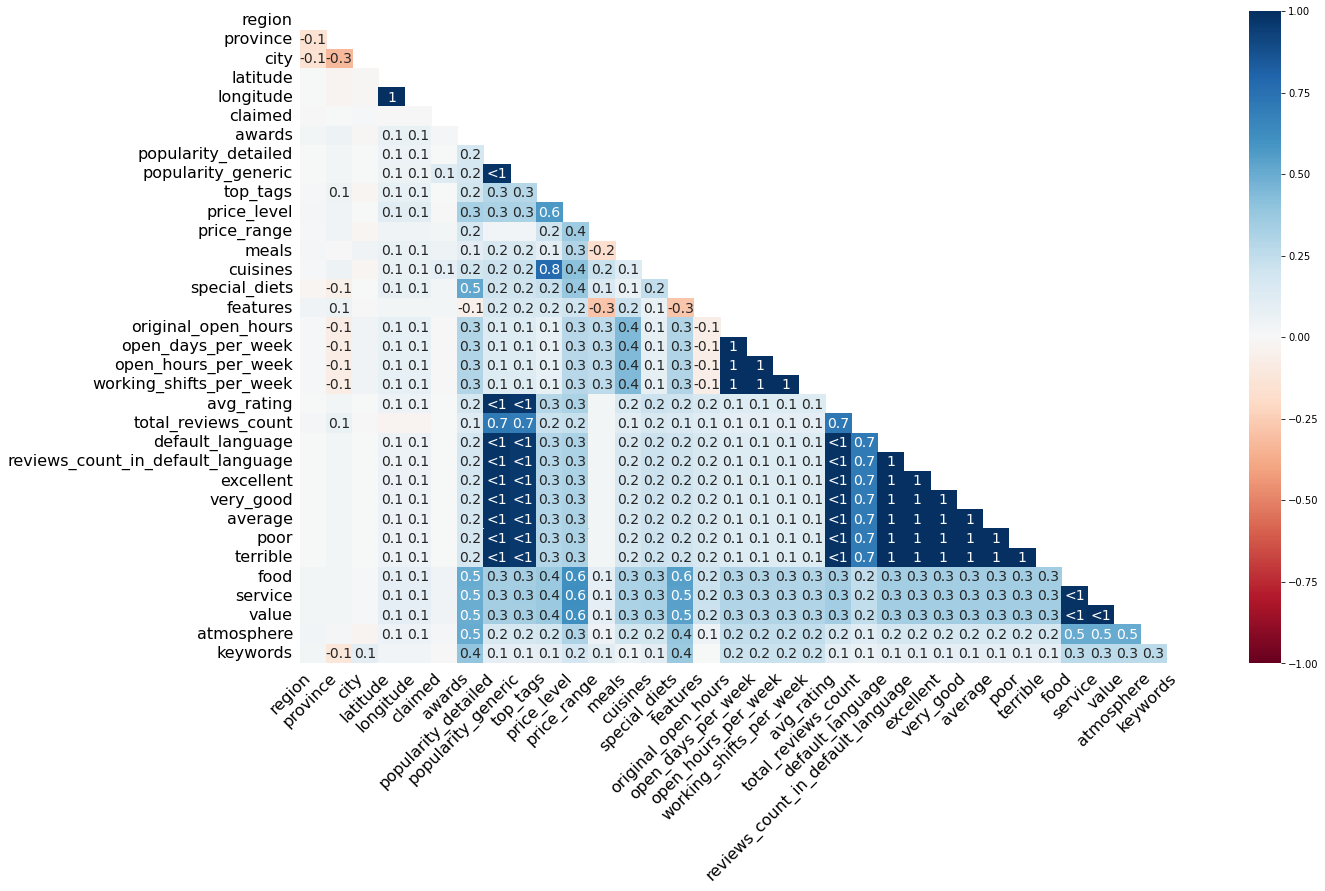

In [23]:
#it can be used to identify if there is a relationship in the presence of null values between each of the columns.
msno.heatmap(df);

Acording to Heat Map, values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

In [24]:
#Checking the proportion of missing data
df.isna().mean().sort_values(ascending = False)

keywords                             0.908438
atmosphere                           0.758367
awards                               0.757122
price_range                          0.719099
features                             0.707026
special_diets                        0.685936
working_shifts_per_week              0.451880
open_hours_per_week                  0.451880
open_days_per_week                   0.451880
original_open_hours                  0.451880
food                                 0.446809
value                                0.443702
service                              0.442229
meals                                0.413560
city                                 0.369841
province                             0.314411
price_level                          0.255867
cuisines                             0.156086
top_tags                             0.102118
popularity_generic                   0.090264
avg_rating                           0.089197
excellent                         

According to the above results 
                         
* keywords  0.908438
* atmosphere 0.758367
* awards                               0.757122
* price_range                          0.719099
* features                             0.707026

These columns contains a high rate of missing data. Removing these columns will be more beneficial for analysis quality.

For the rest of the missing data, it's better to use imputation rules. 

**Important Note**

Deleting column which has high rate of missing data is not just a matter that should be decided according to data density. For example few restaurants may have *special diet* programs like the example in this dataset. This could also be very important for research. Although the density of this data is low, it can have a lot of meaning. At this point, it is necessary to get information from a domain expert in the field.